In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv("demo2.csv")

In [7]:
df.head()

,year,month,interest_rate,unemployment_rate,index_price
0,2023,1,4.5,5.2,2800
1,2023,2,4.6,5.1,2820
2,2023,3,4.7,5.0,2840
3,2023,4,4.8,4.9,2860
4,2023,5,4.7,4.8,2880


In [8]:
df.drop(columns=["year","month"],inplace=True)

In [10]:
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

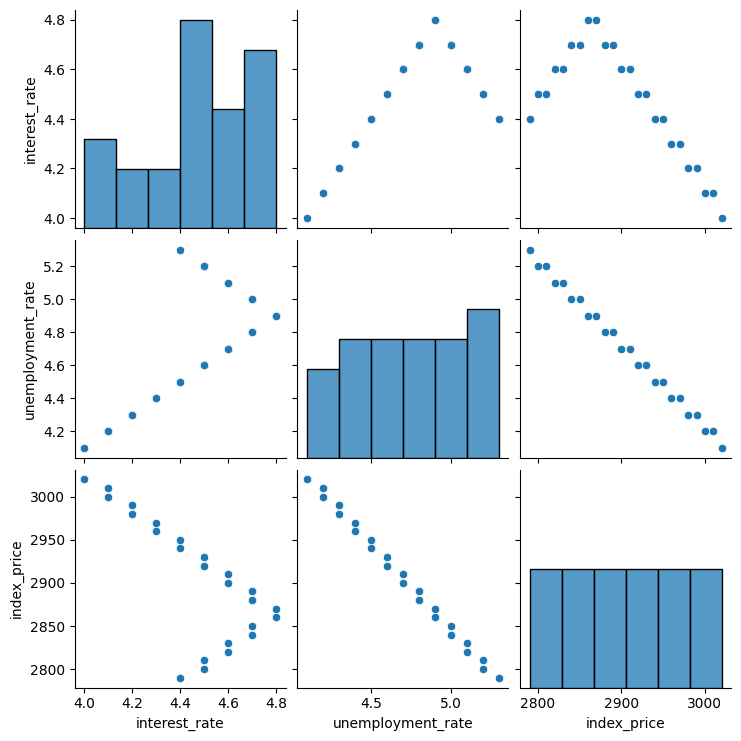

In [11]:
sns.pairplot(df)

In [12]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,0.743784,-0.744228
unemployment_rate,0.743784,1.000000,-0.997442
index_price,-0.744228,-0.997442,1.000000


In [17]:
# X = df[["interest_rate","unemployment_rate"]]

X = df.iloc[:,:-1]
# Y = df["index_price"]
Y = df.iloc[:,-1]

In [19]:
X

,interest_rate,unemployment_rate
0,4.5,5.2
1,4.6,5.1
2,4.7,5.0
3,4.8,4.9
4,4.7,4.8
5,4.6,4.7
6,4.5,4.6
7,4.4,4.5
8,4.3,4.4
9,4.2,4.3


In [20]:
Y

0     2800
1     2820
2     2840
3     2860
4     2880
5     2900
6     2920
7     2940
8     2960
9     2980
10    3000
11    3020
12    3010
13    2990
14    2970
15    2950
16    2930
17    2910
18    2890
19    2870
20    2850
21    2830
22    2810
23    2790
Name: index_price, dtype: int64

In [21]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

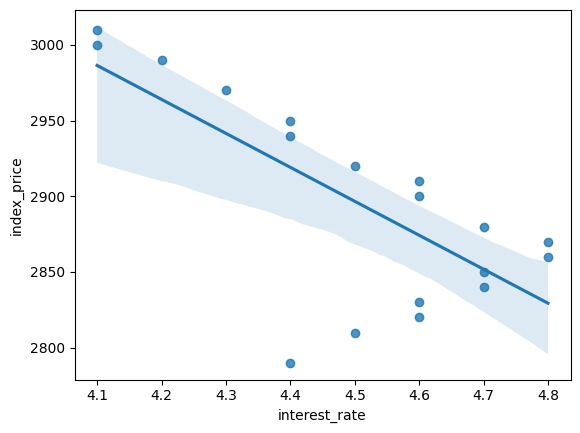

In [22]:
sns.regplot(x=X_train["interest_rate"],y=Y_train)

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

In [26]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test) 

In [28]:
model = LinearRegression(n_jobs=-1)
model.fit(X_train,Y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",-1
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [31]:
val_sc = cross_val_score(model,X_train,Y_train,cv=10,scoring="neg_mean_squared_error") 

In [32]:
np.mean(val_sc)

np.float64(-31.604703725085226)

In [33]:
#prediction

y_pred = model.predict(X_test)

In [34]:
y_pred

array([2927.44765101, 2889.24430037, 2780.9650956 , 2851.04094973,
       2984.75267697, 2946.54932633])

In [ ]:
mse = mean_squared_error(Y_test,y_pred)
rmse = np.sqrt(mse)
print("mse",mse)
print("rmse",rmse)
print("mae",mean_absolute_error(Y_test,y_pred))
print("r2_score",r2_score(Y_test,y_pred))


mse 1160.35650182035
rmse 34.064005956733126
mae 33.33333333333341
r2_score 0.76792869963593


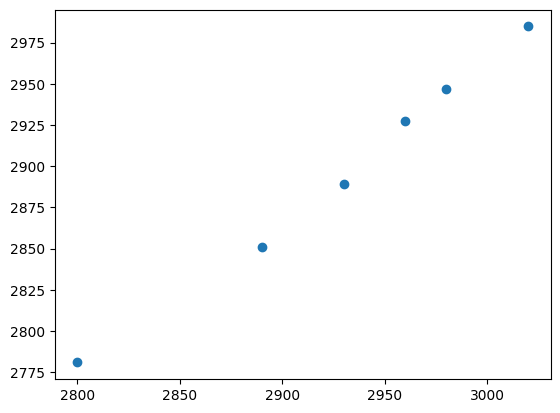

In [36]:
# assumption

plt.scatter(Y_test,y_pred)

In [37]:
res = Y_test-y_pred
res

8     32.552349
16    40.755700
0     19.034904
18    38.959050
11    35.247323
9     33.450674
Name: index_price, dtype: float64

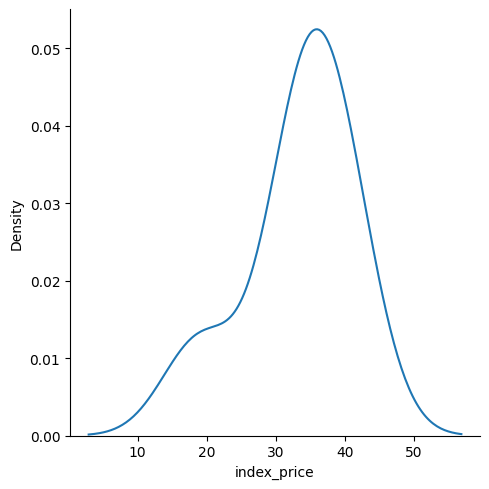

In [38]:
sns.displot(res,kind = 'kde')

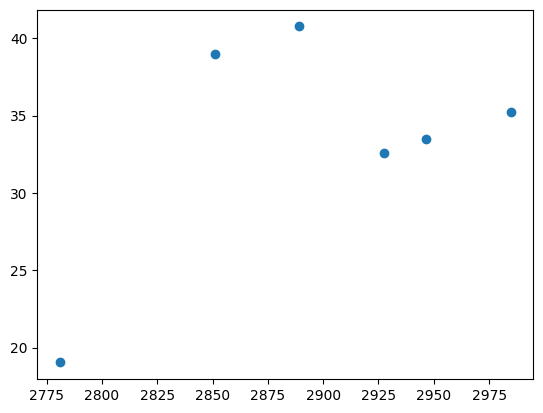

In [39]:
plt.scatter(y_pred,res)

In [40]:
# ols 
import statsmodels.api as sm


In [41]:
models = sm.OLS(Y_train,X_train).fit() 

In [43]:
models.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.001
Model:                            OLS   Adj. R-squared (uncentered):             -0.124
Method:                 Least Squares   F-statistic:                           0.004217
Date:                Fri, 30 Jan 2026   Prob (F-statistic):                       0.996
Time:                        18:06:29   Log-Likelihood:                         -169.02
No. Observations:                  18   AIC:                                      342.0
Df Residuals:                      16   BIC:                                      343.8
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -2.4112   1016.840     -0.002      0.998   -2158.016    2153.193
x2           -64.7890   1016.840     -0.064      0.950   -2220.393    2090.815
==============================================================================
Omnibus:                        9.586   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.008   Jarque-Bera (JB):                1.938
Skew:                          -0.072   Prob(JB):                        0.379
Kurtosis:                       1.399   Cond. No.                         2.39
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
print(f"coefficient {model.coef_}")
print(f"intercept is {model.intercept_}")

coefficient [ -2.41122785 -64.78904032]
intercept is 2896.6666666666665
